In [37]:
import csv
import heapq
import pandas as pd
import matplotlib.pyplot as plt

class Project:
    def __init__(self, index, revenue, days):
        self.index = index
        self.revenue = revenue
        self.days = days

class Node:
    def __init__(self, level, profit, bound, total_days, includes):
        self.level = level
        self.profit = profit
        self.bound = bound
        self.total_days = total_days
        self.includes = includes

    def __lt__(self, other):
        return self.bound > other.bound


In [38]:
# Creating the data for the CSV file
data = {
    "Revenue": [15, 20, 5, 25, 22, 17],
    "Days": [51, 60, 40, 62, 63, 10]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
file_path = 'projects.csv'
df.to_csv(file_path, index=False)

print(f"CSV file '{file_path}' created with the following data:")
print(df)


CSV file 'projects.csv' created with the following data:
   Revenue  Days
0       15    51
1       20    60
2        5    40
3       25    62
4       22    63
5       17    10


In [39]:
def read_projects_from_csv(file_path):
    projects = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for i, row in enumerate(reader):
            revenue = int(row[0])
            days = int(row[1])
            projects.append(Project(i, revenue, days))
    return projects


In [40]:
def bound(node, n, W, projects):
    if node.total_days >= W:
        return 0
    
    profit_bound = node.profit
    j = node.level + 1
    total_days = node.total_days

    while j < n and total_days + projects[j].days <= W:
        total_days += projects[j].days
        profit_bound += projects[j].revenue
        j += 1

    if j < n:
        profit_bound += (W - total_days) * projects[j].revenue / projects[j].days
    
    return profit_bound


In [53]:
def branch_and_bound(projects, W):
    n = len(projects)
    projects_sorted = sorted(projects, key=lambda x: x.revenue / x.days, reverse=True)

    Q = []
    u = Node(-1, 0, 0, 0, [])
    u.bound = bound(u, n, W, projects_sorted)
    heapq.heappush(Q, u)

    max_profit = 0
    best_includes = []

    while Q:
        u = heapq.heappop(Q)

        if u.bound > max_profit:
            v = Node(0, 0, 0, 0, [])

            v.level = u.level + 1
            if v.level < n:
                v.total_days = u.total_days + projects_sorted[v.level].days
                v.profit = u.profit + projects_sorted[v.level].revenue
                v.includes = u.includes + [projects_sorted[v.level].index]

                if v.total_days <= W and v.profit > max_profit:
                    max_profit = v.profit
                    best_includes = v.includes

                v.bound = bound(v, n, W, projects_sorted)
                if v.bound > max_profit:
                    heapq.heappush(Q, v)

            v = Node(0, 0, 0, 0, [])
            v.level = u.level + 1
            v.total_days = u.total_days
            v.profit = u.profit
            v.includes = u.includes

            v.bound = bound(v, n, W, projects_sorted)
            if v.bound > max_profit:
                heapq.heappush(Q, v)

    return max_profit, best_includes


In [54]:
def visualize_projects(projects, best_includes):
    # Project data
    project_indices = list(range(1, len(projects) + 1))
    revenues = [project.revenue for project in projects]
    days = [project.days for project in projects]
    
    # Bar graph for revenue and days
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Project')
    ax1.set_ylabel('Revenue', color=color)
    ax1.bar(project_indices, revenues, color=color, alpha=0.6, label='Revenue')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Days', color=color)
    ax2.plot(project_indices, days, color=color, marker='o', label='Days')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.title('Revenue and Days for Each Project')
    plt.show()

    # Pie chart for selected projects
    selected_revenues = [projects[i - 1].revenue for i in best_includes]
    selected_labels = [f'Project {i}' for i in best_includes]

    plt.figure(figsize=(8, 8))
    plt.pie(selected_revenues, labels=selected_labels, autopct='%1.1f%%', startangle=140)
    plt.title('Selected Projects Contribution to Total Revenue')
    plt.show()


Maximum Profit: 84
Projects to include: [6, 4, 5, 2]
Total number of days used: 195


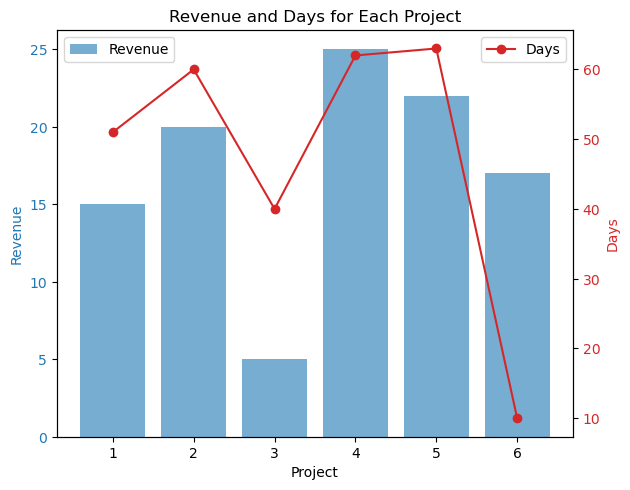

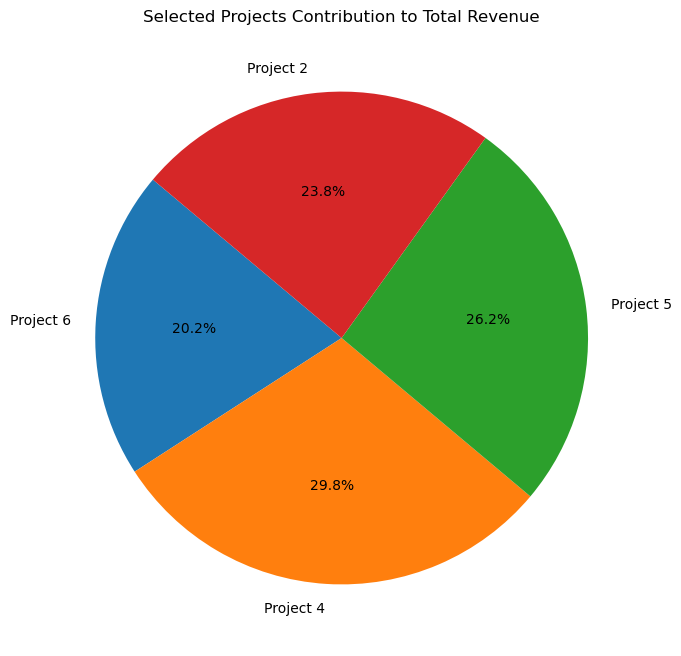

In [55]:
def main():
    file_path = 'projects.csv'
    W = 200  # Example limit on researcher days
    projects = read_projects_from_csv(file_path)
    max_profit, best_includes = branch_and_bound(projects, W)
    
    # Adjust indices to be 1-based
    best_includes = [i + 1 for i in best_includes]
    total_days = sum(projects[i - 1].days for i in best_includes)
    
    # Print results
    print(f"Maximum Profit: {max_profit}")
    print(f"Projects to include: {best_includes}")
    print(f"Total number of days used: {total_days}")

    # Visualizations
    visualize_projects(projects, best_includes)

# Uncomment the line below to execute the script
main()
